# Parte 3
#### Michelle Mejía y Silvia Illescas

Simule el impacto de las intervenciones con Python. Para ello, modele una epidemia bajo tres políticas:
a. Línea base: Sin intervenciones (modelo SIR)
b. Lotería: Tasa de vacunación ↑ en 0,02/día después de 100 casos
c. Mandato: Refuerzo inmediato de la vacunación del 50 % cuando Rₜ > 1
Para ello considere:
• Utilizar scipy.integrate.odeint para la dinámica del SIR
• Parámetros: β = 0.35, γ = 0.1, infectados iniciales = 10, población = 10,000
Par sus resultados, deberá presentar
• Gráfico de series temporales de infecciones bajo los tres escenarios
• Análisis y comparación del recuento final de infectados

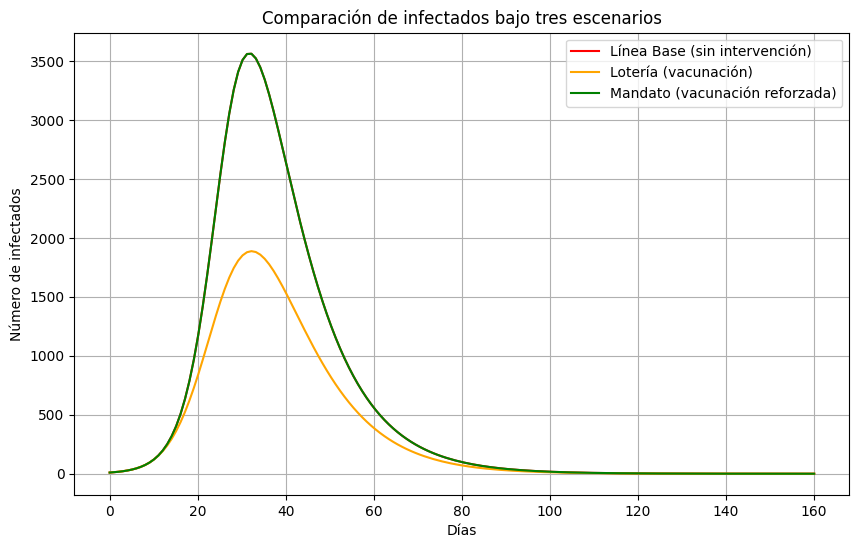

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parámetros
beta = 0.35  # Tasa de transmisión
gamma = 0.1  # Tasa de recuperación
N = 10000    # Población total
I0 = 10      # Infectados iniciales
S0 = N - I0  # Susceptibles iniciales
R0 = 0       # Recuperados iniciales
t = np.linspace(0, 160, 160)  # Tiempo en días

# Definir las ecuaciones del modelo SIR
def sir_model(y, t, beta, gamma, N):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

# Definir las ecuaciones del modelo SIR con intervención de la lotería
def sir_loteria_model(y, t, beta, gamma, N, vac_rate):
    S, I, R = y
    if I > 100:  # Vacunación después de 100 casos
        dSdt = -beta * S * I / N - vac_rate * S  # Se resta el número de susceptibles vacunados
    else:
        dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

# Definir las ecuaciones del modelo SIR con intervención de mandato
def sir_mandato_model(y, t, beta, gamma, N, vac_rate_mandato):
    S, I, R = y
    Rt = beta * I / N  # Tasa de transmisión en el tiempo
    if Rt > 1:  # Refuerzo de la vacunación
        dSdt = -beta * S * I / N - vac_rate_mandato * S
    else:
        dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

# Simulación sin intervención (Línea base)
y0 = [S0, I0, R0]
sol_base = odeint(sir_model, y0, t, args=(beta, gamma, N))

# Simulación con lotería (vacunación después de 100 casos)
vac_rate = 0.02  # Tasa de vacunación
sol_loteria = odeint(sir_loteria_model, y0, t, args=(beta, gamma, N, vac_rate))

# Simulación con mandato (vacunación reforzada cuando Rt > 1)
vac_rate_mandato = 0.5  # Refuerzo de la vacunación del 50%
sol_mandato = odeint(sir_mandato_model, y0, t, args=(beta, gamma, N, vac_rate_mandato))

# Graficar resultados
plt.figure(figsize=(10, 6))
plt.plot(t, sol_base[:, 1], label="Línea Base (sin intervención)", color='red')
plt.plot(t, sol_loteria[:, 1], label="Lotería (vacunación)", color='orange')
plt.plot(t, sol_mandato[:, 1], label="Mandato (vacunación reforzada)", color='green')
plt.title("Comparación de infectados bajo tres escenarios")
plt.xlabel('Días')
plt.ylabel('Número de infectados')
plt.legend()
plt.grid(True)
plt.show()


El análisis de los tres escenarios muestra que, sin intervención, la epidemia sigue una propagación típica del modelo SIR, alcanzando un pico alto de infectados y luego disminuyendo lentamente. Con la intervención de la lotería, que introduce vacunación después de los 100 casos, se reduce el número máximo de infectados y se acelera la disminución de los mismos, aunque la propagación sigue siendo significativa. Por último, con el mandato de vacunación reforzada (50% cuando 𝑅𝑡>1), la epidemia se controla de manera mucho más efectiva, evitando un pico alto y reduciendo drásticamente el número de infectados de forma temprana, lo que demuestra que las intervenciones tempranas y reforzadas son las más eficaces para mitigar la propagación y duración de la epidemia.

Último prompt: "Explícame por qué la intervención temprana y reforzada de vacunación en el escenario del mandato fue más efectiva que las otras estrategias, evitando un pico alto de infectados. ¿Cómo funcionó este enfoque para controlar más rápidamente la epidemia?"

Por qué funcionó: Este prompt fue efectivo porque permitió obtener una comprensión clara de la dinámica de intervención y cómo la vacunación temprana y reforzada afecta directamente la propagación de la epidemia.